In [348]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
from sklearn.preprocessing import LabelEncoder

In [349]:
df=pd.read_csv("D:\winequality.csv")

In [350]:

df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [351]:
df.shape


(6497, 13)

In [352]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [353]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [354]:
df['fixed acidity'].fillna((df['fixed acidity'].mean()),inplace=True)

In [355]:
df['volatile acidity'].fillna((df['volatile acidity'].mean()),inplace=True)
df['volatile acidity'].fillna((df['volatile acidity'].mean()),inplace=True)
df['citric acid'].fillna((df['citric acid'].mean()),inplace=True)
df['residual sugar'].fillna((df['residual sugar'].mean()),inplace=True)
df['chlorides'].fillna((df['chlorides'].mean()),inplace=True)
df['pH'].fillna((df['pH'].mean()),inplace=True)
df['sulphates'].fillna((df['sulphates'].mean()),inplace=True)


In [356]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [357]:
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,5


In [358]:
le=LabelEncoder()
le.fit(df['type'])
df['type']=le.transform(df['type'])

In [359]:
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,6
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,6
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,6
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,5
6493,0,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2,6
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,6
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,5


In [360]:
df=df.drop('type',axis=1)

In [361]:
X=df
X=X.drop('quality',axis=1)
Y=df['quality']

In [362]:
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36            20.7      0.045   
1               6.3             0.300         0.34             1.6      0.049   
2               8.1             0.280         0.40             6.9      0.050   
3               7.2             0.230         0.32             8.5      0.058   
4               7.2             0.230         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
6492            6.2             0.600         0.08             2.0      0.090   
6493            5.9             0.550         0.10             2.2      0.062   
6494            6.3             0.510         0.13             2.3      0.076   
6495            5.9             0.645         0.12             2.0      0.075   
6496            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [363]:
print(Y)

0       6
1       6
2       6
3       6
4       6
       ..
6492    5
6493    6
6494    6
6495    5
6496    6
Name: quality, Length: 6497, dtype: int64


In [364]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [365]:
bestfeatures=SelectKBest(score_func=chi2,k='all')
fit=bestfeatures.fit(x,y)
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(x.columns)
featuresScores=pd.concat([dfcolumns,dfscores],axis=1 )
featuresScores.columns=['specs','score']

In [366]:
featuresScores

,specs,score
0,fixed acidity,11.133107
1,volatile acidity,42.573553
2,citric acid,3.690176
3,residual sugar,224.945652
4,chlorides,6.388241
5,free sulfur dioxide,913.332832
6,total sulfur dioxide,1269.974108
7,density,0.006600
8,pH,0.096622
9,sulphates,1.090422


In [367]:
from collections import Counter
print(Counter(Y))
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X, Y = ros.fit_resample(X,Y)
print(Counter(Y))

Counter({6: 2836, 5: 2138, 7: 1079, 4: 216, 8: 193, 3: 30, 9: 5})
Counter({6: 2836, 5: 2836, 7: 2836, 8: 2836, 4: 2836, 3: 2836, 9: 2836})


In [368]:
out = ['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
for i in out:
    # sns.boxplot(df[i])
    # plt.show()
    # print(X[i])
    Q1 = X[i].quantile(0.25)
    Q3 = X[i].quantile(0.75)
    IQR = Q3 - Q1
    # print(IQR)
    upper = Q3 + 1.5 * IQR
    lower = Q1 - 1.5 * IQR
    # print(upper)
    # print(lower)
    out1 = X[X[i] < lower].values
    out2 = X[X[i] > upper].values
    X[i].replace(out1, lower, inplace=True)
    X[i].replace(out2, upper, inplace=True)
   

In [369]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model=ExtraTreesRegressor()
model.fit(X,Y)
print(model.feature_importances_)

[0.05142606 0.00511475 0.03001227 0.06338936 0.1475538  0.12308713
 0.10012548 0.11509112 0.05886187 0.05864117 0.24669701]


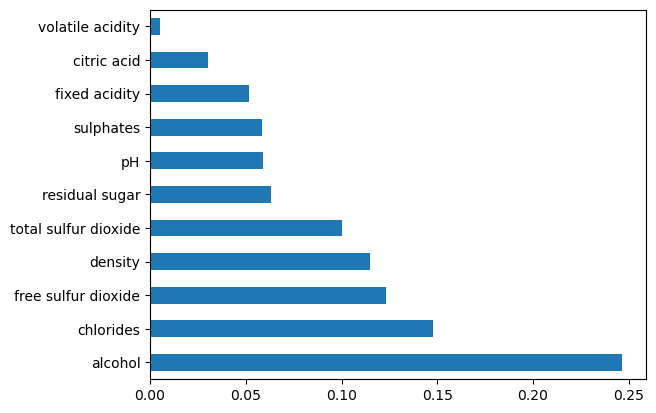

In [370]:
feat_importance=pd.Series(model.feature_importances_,index=X.columns)
feat_importance.nlargest(12).plot(kind="barh")
plt.show()

In [371]:
corr=X.corr()

In [372]:
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,0.061737,-0.015883,0.045865,0.048503,-0.034572,-0.010228,0.061914,-0.009970,0.017493,-0.081326
volatile acidity,0.061737,1.000000,-0.044793,0.041717,0.026067,-0.061568,-0.009142,0.020650,-0.070891,0.005405,0.060825
citric acid,-0.015883,-0.044793,1.000000,-0.021512,-0.107508,0.094450,0.040389,-0.123836,0.005073,0.028217,0.017508
residual sugar,0.045865,0.041717,-0.021512,1.000000,-0.007228,0.102393,0.310775,0.431343,-0.298087,-0.123647,-0.271754
chlorides,0.048503,0.026067,-0.107508,-0.007228,1.000000,-0.114483,-0.113871,0.643208,0.079586,0.309270,-0.504831
free sulfur dioxide,-0.034572,-0.061568,0.094450,0.102393,-0.114483,1.000000,0.354620,0.027482,-0.047837,-0.047138,-0.119910
total sulfur dioxide,-0.010228,-0.009142,0.040389,0.310775,-0.113871,0.354620,1.000000,0.130224,-0.118602,-0.079325,-0.172718
density,0.061914,0.020650,-0.123836,0.431343,0.643208,0.027482,0.130224,1.000000,-0.122165,0.254387,-0.777732
pH,-0.009970,-0.070891,0.005073,-0.298087,0.079586,-0.047837,-0.118602,-0.122165,1.000000,0.066896,0.191578
sulphates,0.017493,0.005405,0.028217,-0.123647,0.309270,-0.047138,-0.079325,0.254387,0.066896,1.000000,-0.109290


<Axes: >

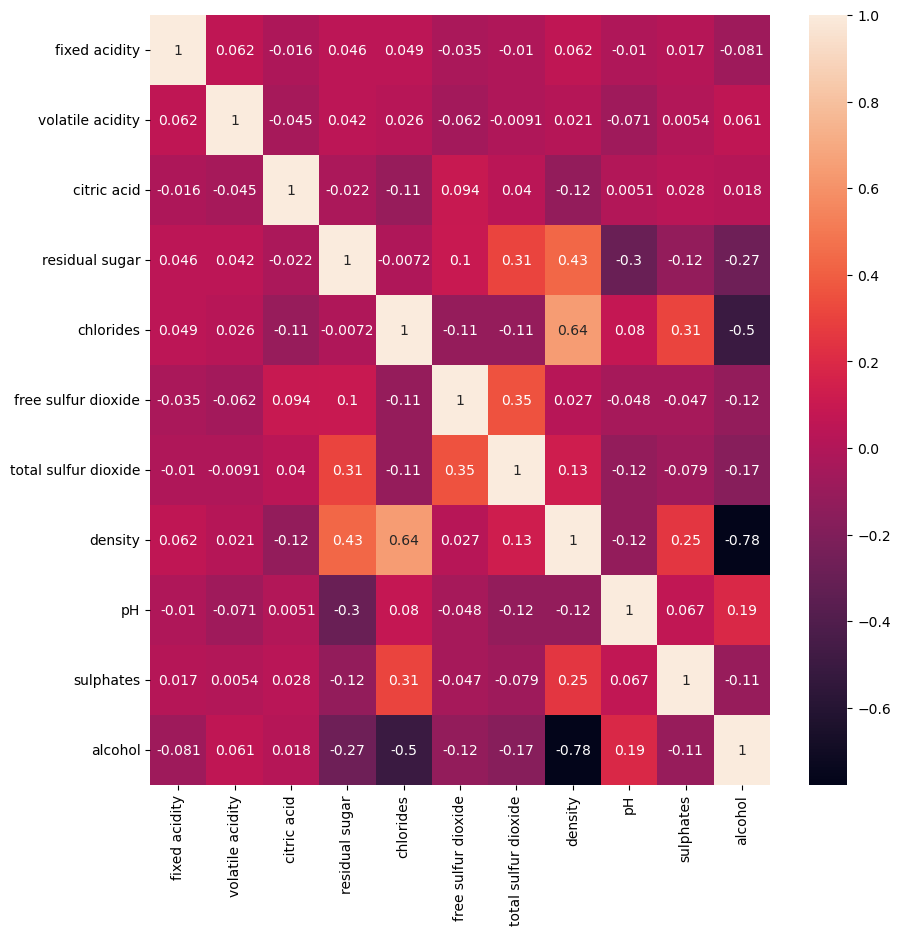

In [373]:
import seaborn as sns
fig,ax=plt.subplots(figsize=(10,10))
sns.heatmap(corr,annot=True,ax=ax)

In [374]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
rfc=RandomForestRegressor()
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=0,test_size=0.1)
rfc.fit(X_train,Y_train)


RandomForestRegressor()

In [375]:
Y_pred=rfc.predict(X_test)


In [376]:
from sklearn.metrics import r2_score
print(r2_score(Y_test,Y_pred))

0.9858541785467226


<Axes: >

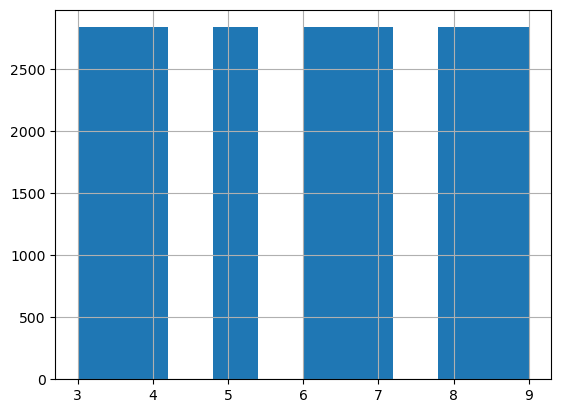

In [377]:
Y.hist()